<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [590]:
# import the pacakges
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, RareLabelEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser, EqualWidthDiscretiser
from feature_engine.transformation import LogTransformer, ReciprocalTransformer, PowerTransformer, BoxCoxTransformer, YeoJohnsonTransformer
from feature_engine.outliers import Winsorizer
from feature_engine.imputation import MeanMedianImputer


# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Step 0: Data Exploration
[Back to report](#report)
##### Important findings
<a id="data_explore"></a>

After performing surface - level data exploration, these are my important findings.

##### Relationship of Item_MRP vs Target
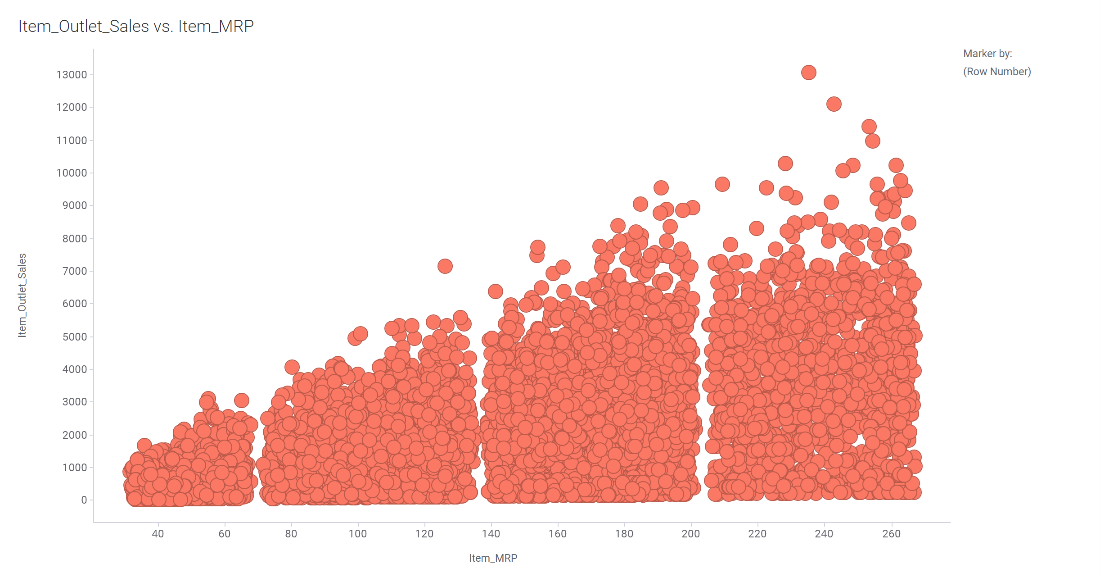
Item_MRP feature has strong linear relationship with the target variable.

##### Average target of Outlet_Size
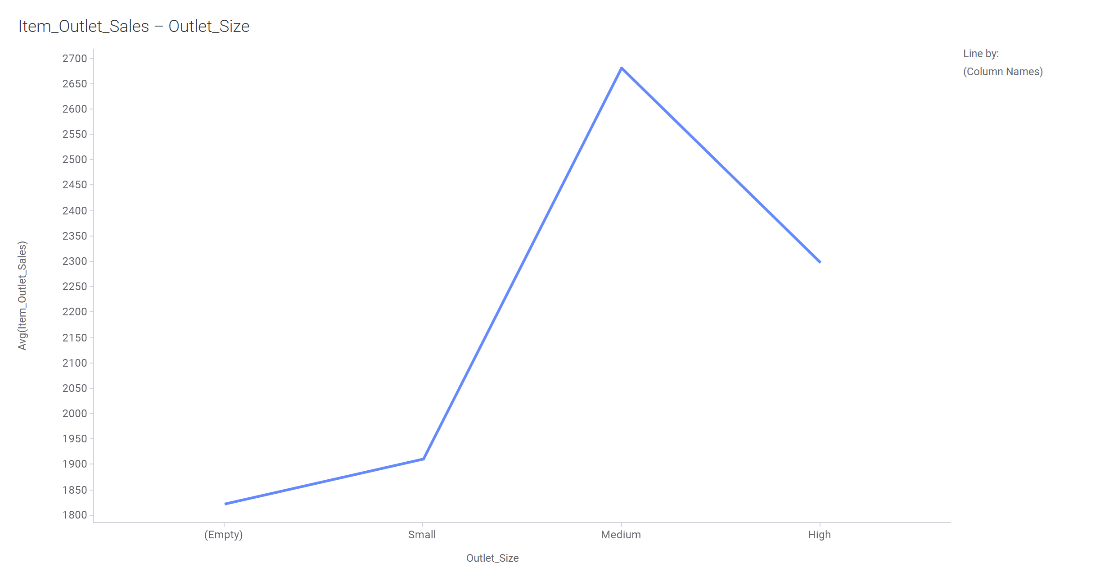
There were missing values that when their average target variable was compared with the rest, was similar to that of the Small Outlet_Size. 

### Step 1: Load Data into Jupyter Notebook
##### Load the data into a DataFrame variable and provide an overview of the DataFrame variable using the relevant functions(e.g. head(), info(), describe() and etc.)

In [591]:
data = pd.read_csv("supermarket.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [592]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [593]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [594]:
data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [595]:
# This allows me to see which features are categorical vs continuous
for y in data:
    print("Column:", str(y), "\n", data[y].unique(), "\n")

Column: Item_Identifier 
 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 

Column: Item_Weight 
 [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.7

### Step 2: Data Preprocessing
##### Are there any outliers? How did you identify them and how to deal with them? Are you happy with the distribution of the numerical variables? Do you need to transform the numerical variables using proper transformation methods (e.g. log transformation, Box-Cox and etc.)? 

Categorical Data:
Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type

Numerical Data:
Item_Weight
Item_Visibility
Item_MRP
Item_Outlet_Sales

In [596]:
categorical_data = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                    'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

numerical_data = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']             

#### Identifying rare categories

In [597]:
#this is a function to plot a bar chart showing rare categories in categorical data

def rare_category(data, variable):
    label_freq = data[variable].value_counts()/len(data)
    fig = label_freq.sort_values(ascending=False).plot.bar()

    fig.axhline(y=0.05, color='red')

    # add axis labels and title
    fig.set_xlabel('Variable: {0}'.format(variable))
    fig.set_title('Identifying Rare Categories')
    plt.show()

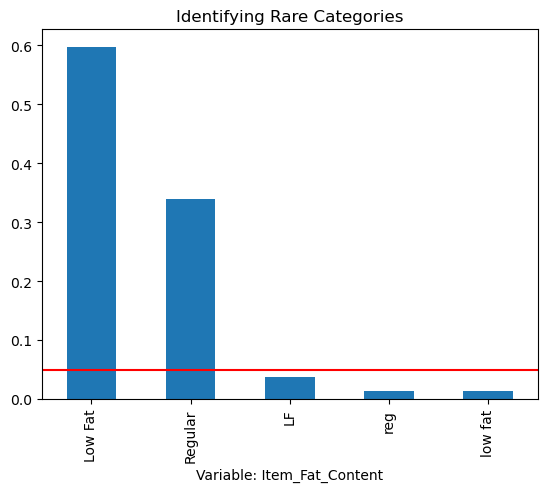

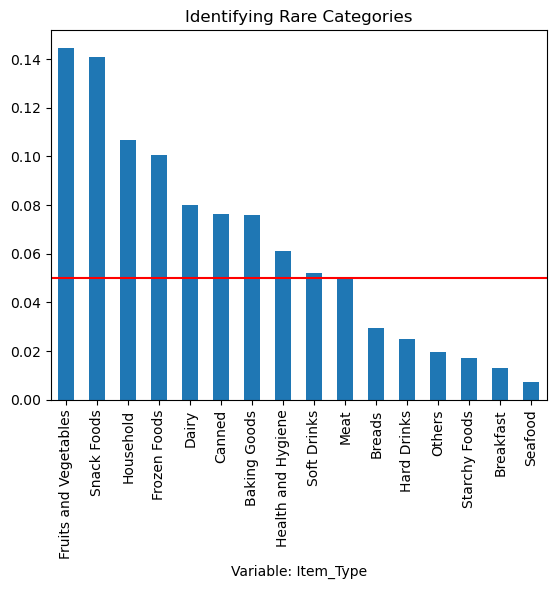

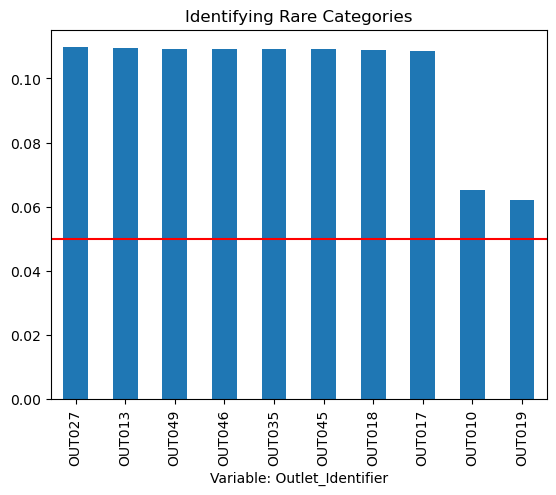

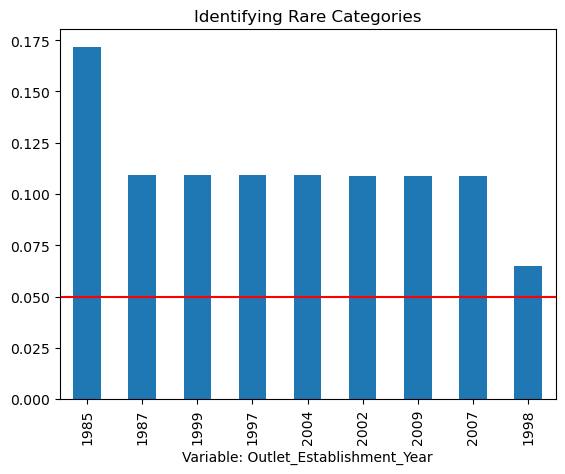

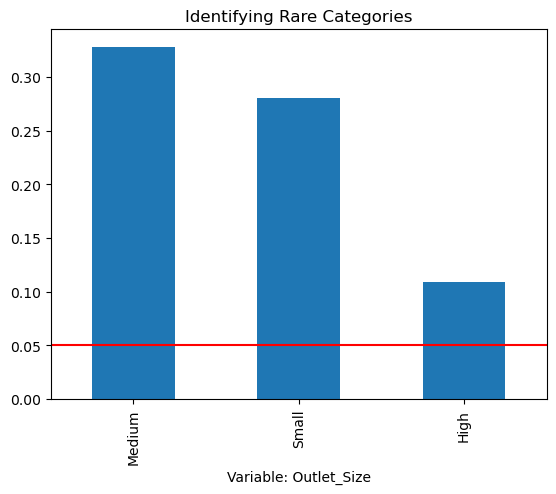

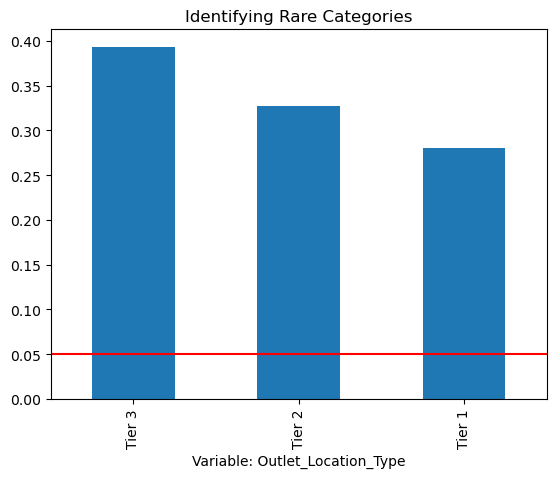

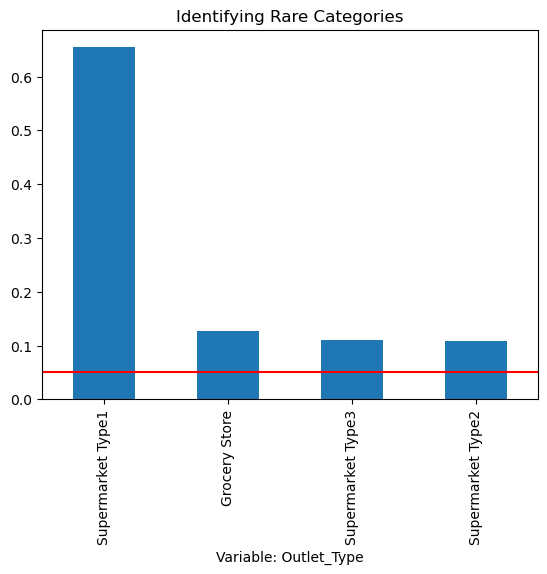

In [598]:
for x in categorical_data:
    rare_category(data, x)

In [599]:
#we can see that there are rare categories in Item_Type
#there is also irregular naming of the data in Item_Fat_Content

#Item_Fat_Content:
#LF, reg, low fat -> Low Fat, Regular
data['Item_Fat_Content']= data['Item_Fat_Content'].replace('LF', 'Low Fat')
data['Item_Fat_Content']= data['Item_Fat_Content'].replace('low fat', 'Low Fat')
data['Item_Fat_Content']= data['Item_Fat_Content'].replace('reg', 'Regular')

#Item_Type:
#Breads -> Baking Goods
data['Item_Type']= data['Item_Type'].replace('Breads', 'Baking Goods')

#Breakfast, Seafood , Starchy Foods, Hard Drinks -> Others
data['Item_Type']= data['Item_Type'].replace('Breakfast', 'Others')
data['Item_Type']= data['Item_Type'].replace('Seafood', 'Others')
data['Item_Type']= data['Item_Type'].replace('Starchy Foods', 'Others')
data['Item_Type']= data['Item_Type'].replace('Hard Drinks', 'Others')

In [600]:
# checking if replacing was successful
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

#### Numerical Analysis

In [601]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

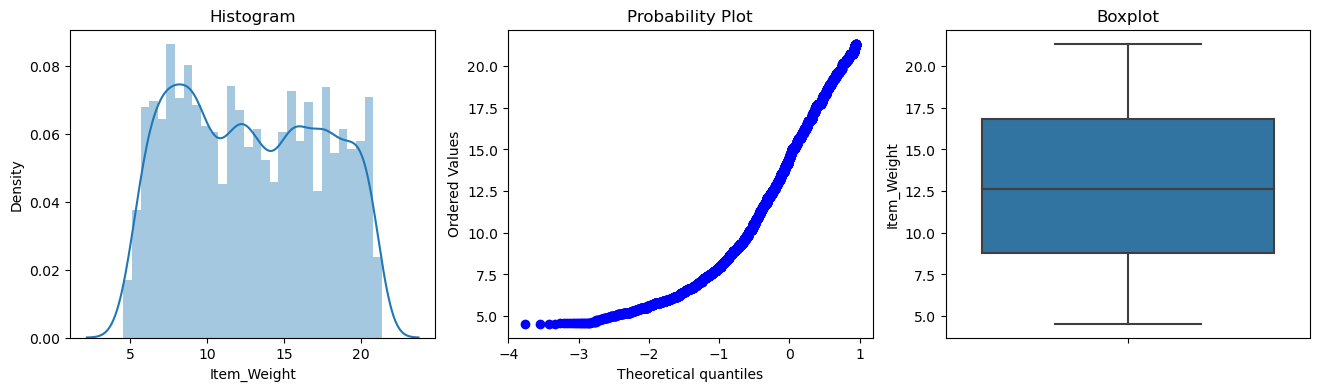

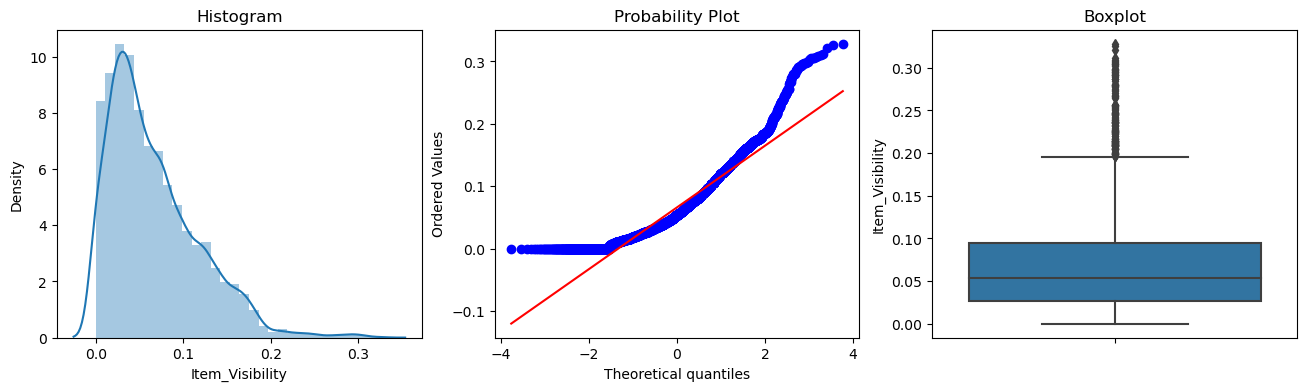

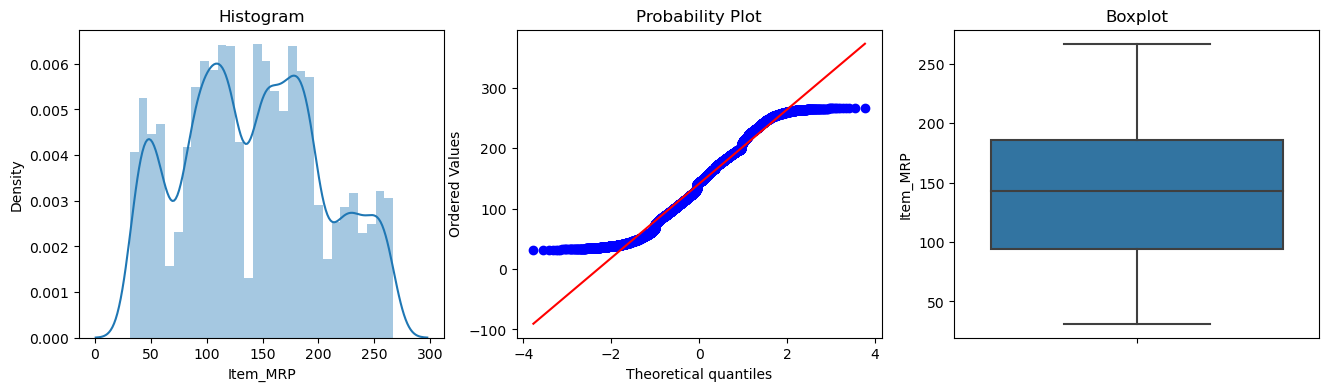

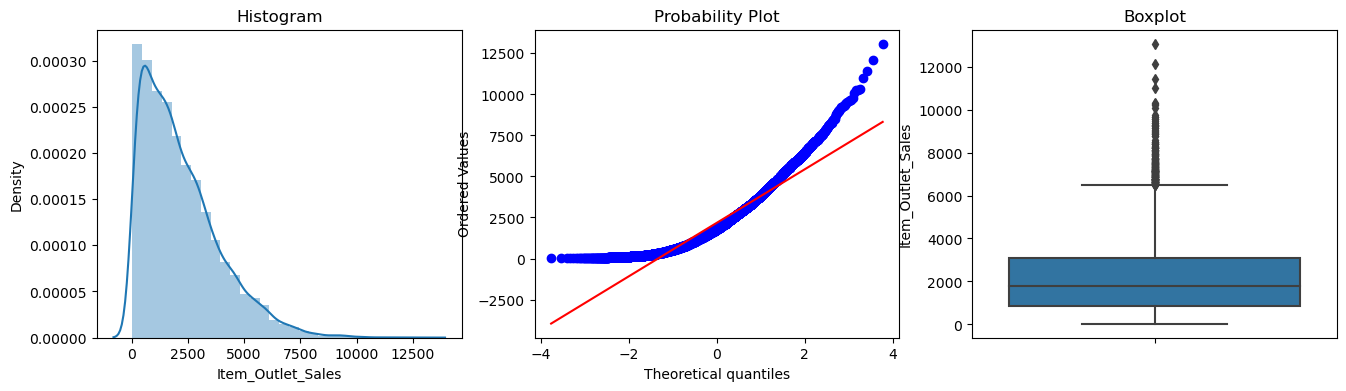

In [602]:
# diagnostic plots for all numerical features (excluding Outlet_Establishment_Year)
for x in numerical_data:
    diagnostic_plots(data, x)

### Outlier handling
[Back to report](#report)
<a id="outliers"></a>

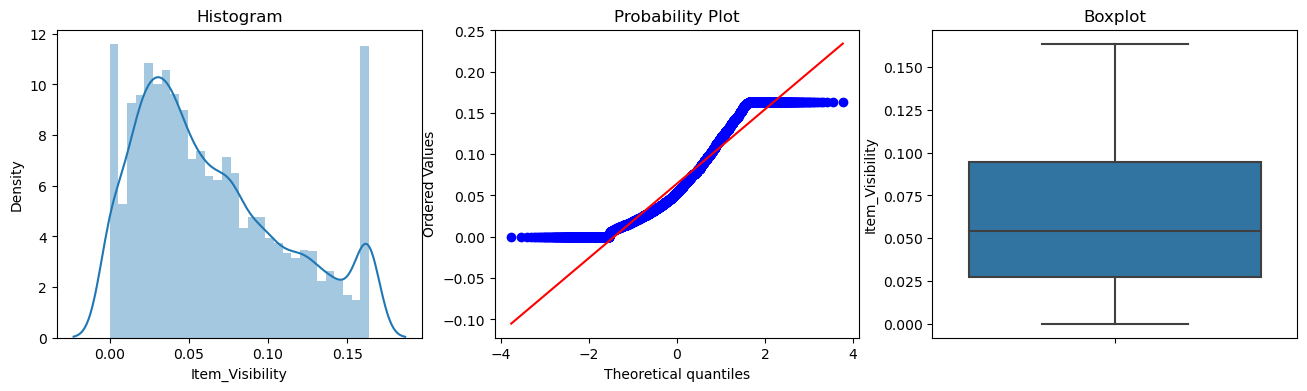

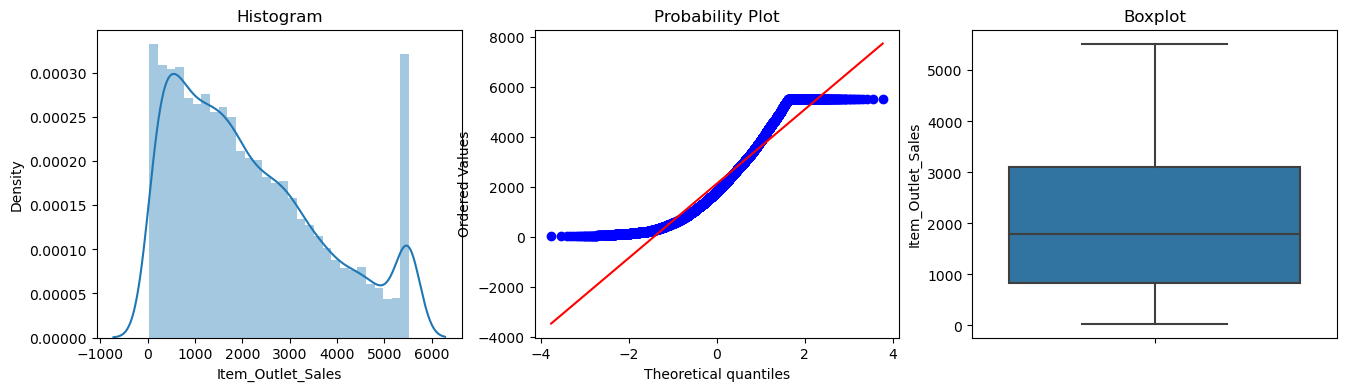

In [603]:
windsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='right', # cap left, right or both tails
                        fold =0.05,
                        variables=['Item_Visibility', 'Item_Outlet_Sales'])

windsorizer.fit(data)
data = windsorizer.transform(data)

diagnostic_plots(data, 'Item_Visibility')
diagnostic_plots(data, 'Item_Outlet_Sales')

In [604]:
#Item_Weight and Item_Visibility needs to be transformed and outliers need to be handled 
#for Item_Visibilty and Item_Outlet_Sales

data[numerical_data].min()

Item_Weight           4.555
Item_Visibility       0.000
Item_MRP             31.290
Item_Outlet_Sales    33.290
dtype: float64

In [605]:
#Here I replace zero values in Item_Visibility in order to use all kinds of transformation on it
#this is done before splitting so i don't have to do twice for X_train and X_test

data['Item_Visibility'] = data['Item_Visibility'].replace(0, 0.001)

### Step 3: Train Test Split

In [606]:
data = data.drop('Item_Identifier', axis=1)
data.head()

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Item_Outlet_Sales', axis=1), data['Item_Outlet_Sales'], test_size=0.3, random_state=0)

### Step 4: Missing Value Imputation
##### Are there any missing values? How did you handle them and why?
[Back to report](#report)
<a id="imputation"></a>

Text(0.5, 1.0, 'Quantifying missing data')

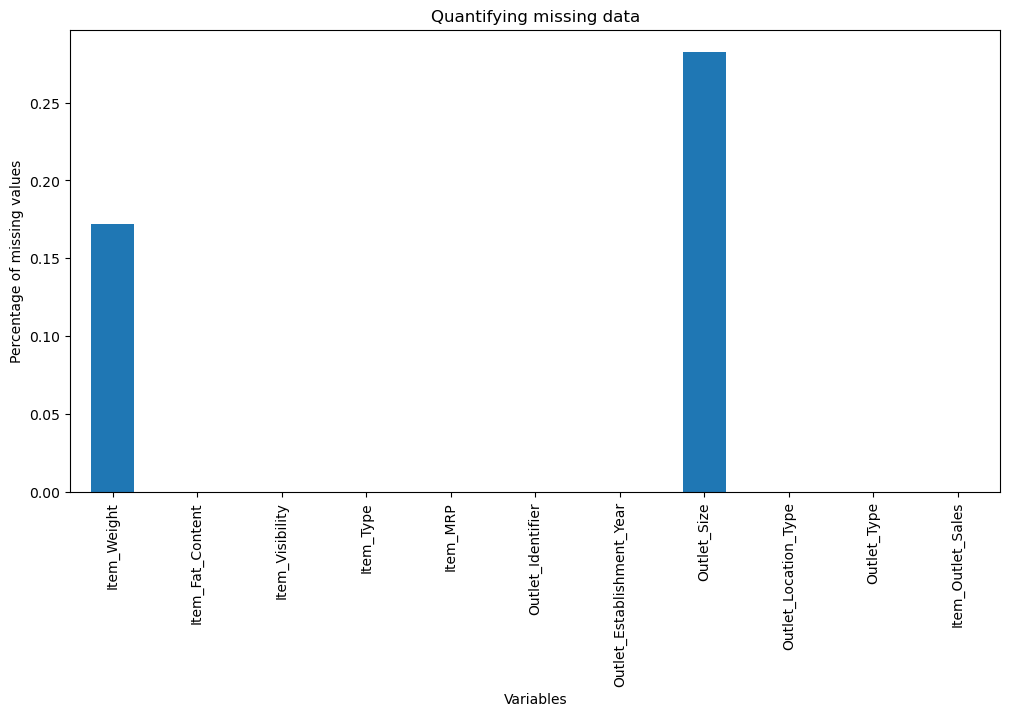

In [607]:
#Missing data
data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [608]:
data.isnull().mean()

Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

##### Methods of Imputation:
Mean / Median
<br> Mode / Frequent
<br> Arbitrary
<br> Bespoke
<br> Value at end of distribution
<br> Random Sample
<br> Missing Value Indicator

<Axes: ylabel='Item_Weight'>

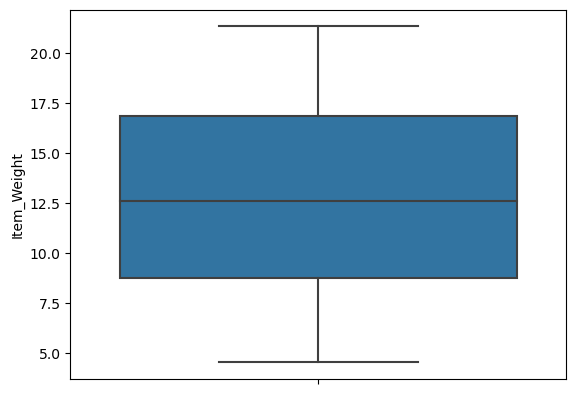

In [609]:
sns.boxplot(y=data['Item_Weight'])

Using a chart from my spotfire EDA, we can see the missing values for Outlet_Size
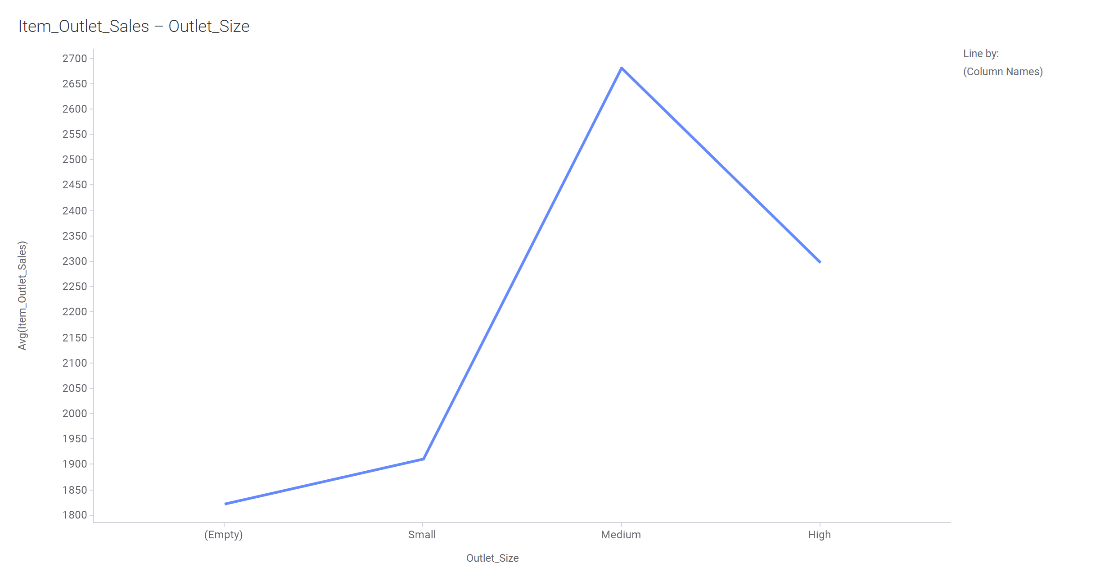

In [610]:
#I will be using mean for Item_Weight as there aren't any outliers and I don't want to introduce any bias into the data

#I will be using bespoke for Outlet_Size and regrouping missing values as 'Small' as from my data exploration I gathered
#that the average outlet sale for missing Outlet_Size was similar to that of Small Outlet_Size

#instantiating the pipeline
features_cat_missing = ['Outlet_Size']
features_num = ['Item_Weight']

pipe = Pipeline(steps=[
    ('imp_num_mean', mdi.MeanMedianImputer(variables=features_num, imputation_method='mean')),
    ('imp_cat_missing', mdi.CategoricalImputer(variables=features_cat_missing, imputation_method='missing'))
])
     

pipe.fit(X_train)

Pipeline(steps=[('imp_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Item_Weight'])),
                ('imp_cat_missing',
                 CategoricalImputer(variables=['Outlet_Size']))])

In [611]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [612]:
X_train.isnull().mean()

Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64

In [613]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
88,6.305000,Regular,0.123116,Snack Foods,95.6436,OUT046,1997,Small,Tier 1,Supermarket Type1
6813,5.980000,Low Fat,0.043809,Fruits and Vegetables,146.8418,OUT017,2007,Missing,Tier 2,Supermarket Type1
4046,12.929873,Low Fat,0.072317,Household,160.7920,OUT027,1985,Medium,Tier 3,Supermarket Type3
8194,12.929873,Regular,0.163780,Dairy,157.8630,OUT019,1985,Small,Tier 1,Grocery Store
8293,9.100000,Low Fat,0.080278,Household,47.2718,OUT035,2004,Small,Tier 2,Supermarket Type1


In [614]:
data['Outlet_Size'] = data['Outlet_Size'].replace('Missing', 'Small')

### Step 5: Transforming numerical variables
[Back to report](#report)
<a id="transform"></a><br>
For numerical transformation, I tried and tested all the transformers we had been taught to weigh my options and select
the best outcome.

##### Logarithmic - Item_Weight

In [615]:
X_train_tf = X_train.copy()
# initialize the transformer
lt = LogTransformer(variables=['Item_Weight'])

# fit transformer to data set
lt.fit(X_train_tf)
X_train_transf = lt.transform(X_train_tf)

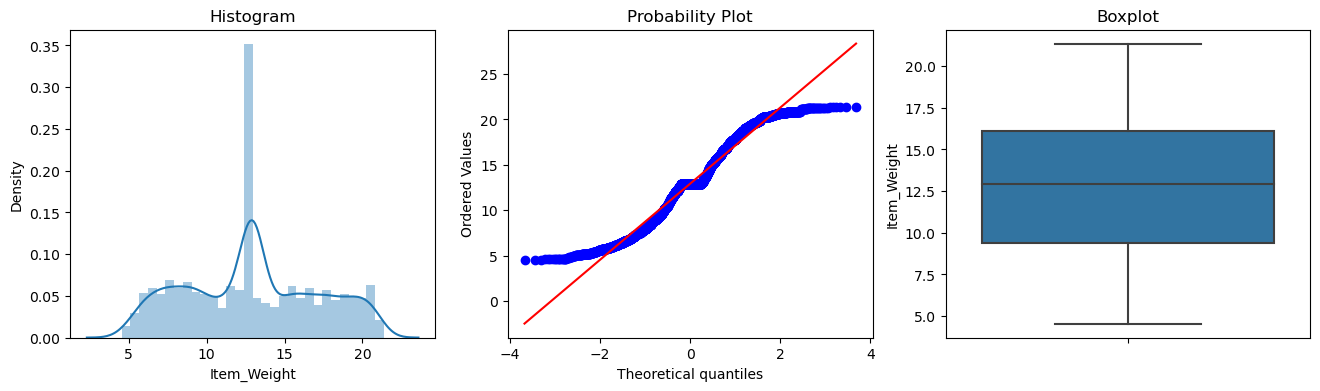

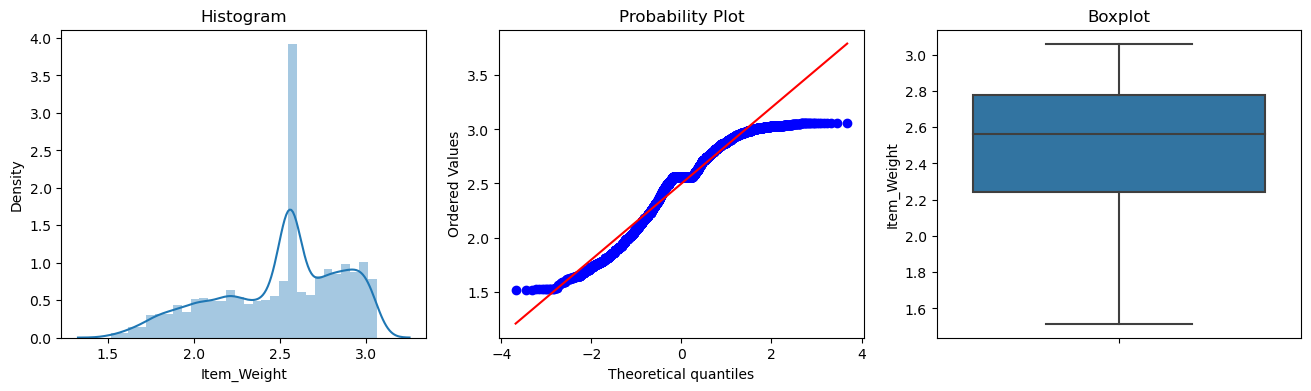

In [616]:
dataframes = [X_train, X_train_transf]
for x in dataframes:
    diagnostic_plots(x, 'Item_Weight')



##### Reciprocal - Item_Weight

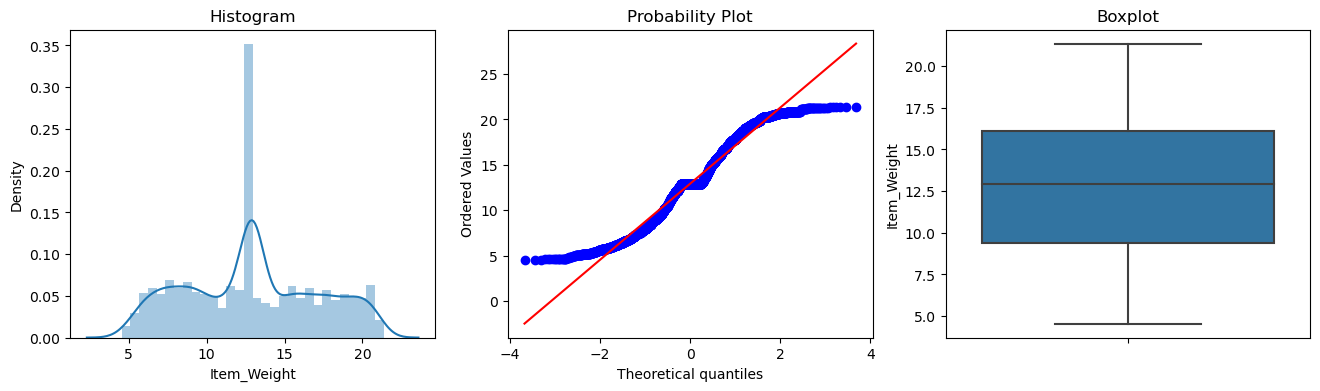

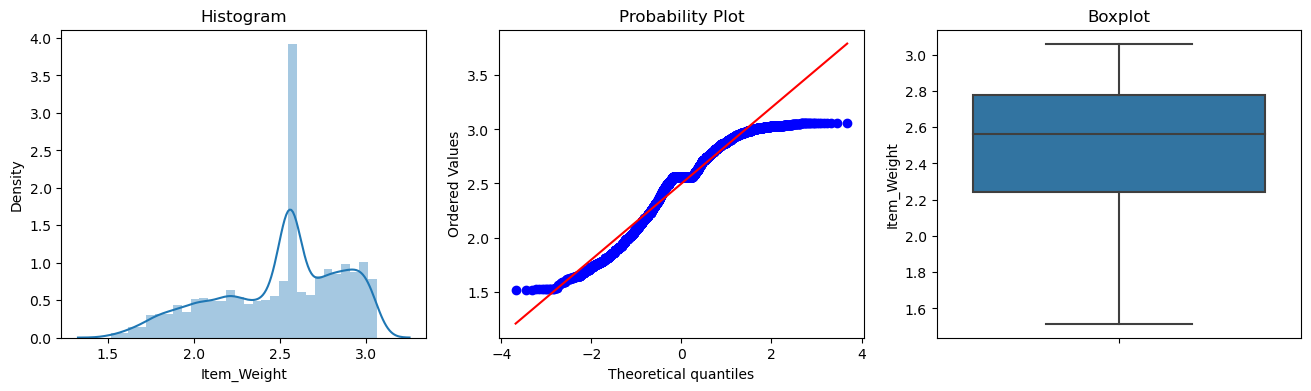

In [617]:
X_train_tf = X_train.copy()
X_train_transf = X_train.copy()
X_train_transf['Item_Weight'] = np.reciprocal(X_train_tf['Item_Weight'])
for x in dataframes:
    diagnostic_plots(x, 'Item_Weight')
    
#after transformation, a left skew appears

##### Square Cube Root - Item_Weight

In [618]:
X_train_tf = X_train.copy()
X_train_sqr = X_train.copy()
# set up PowerTransformer with the square root exponent
et = PowerTransformer(variables = ['Item_Weight'], exp=1/2)

# fit transformer to data 
et.fit(X_train_tf)
X_train_sqr = et.transform(X_train_tf)

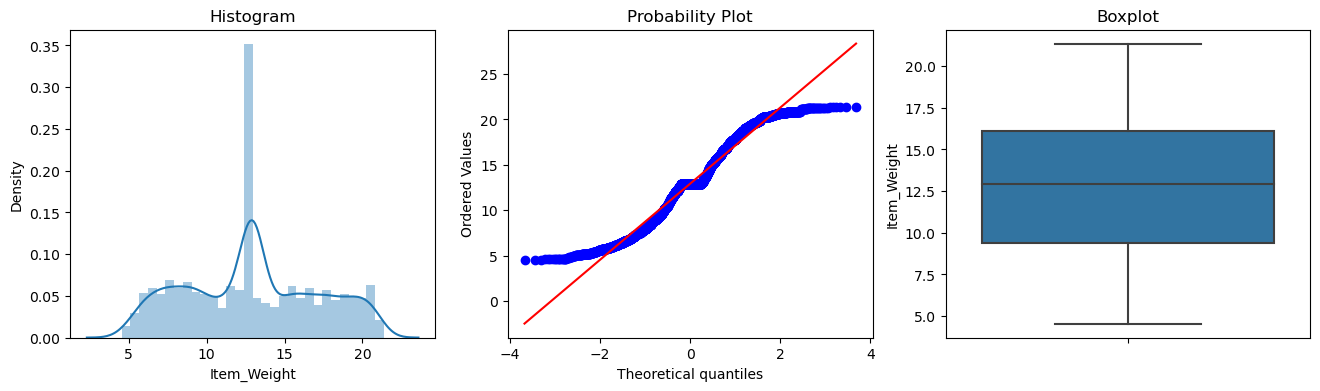

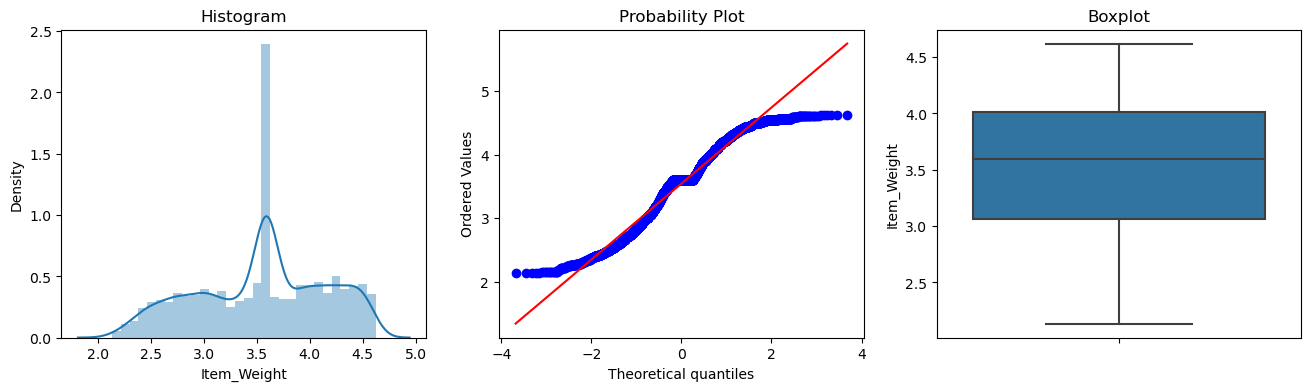

In [619]:
diagnostic_plots(X_train, 'Item_Weight')
diagnostic_plots(X_train_sqr, 'Item_Weight')

#after transformation, a left skew appears

##### Power - Item_Weight

In [620]:
X_train_tf = X_train.copy()
X_train_power = X_train.copy()

X_train_power["Item_Weight"] = np.power(X_train_tf["Item_Weight"], 0.7)

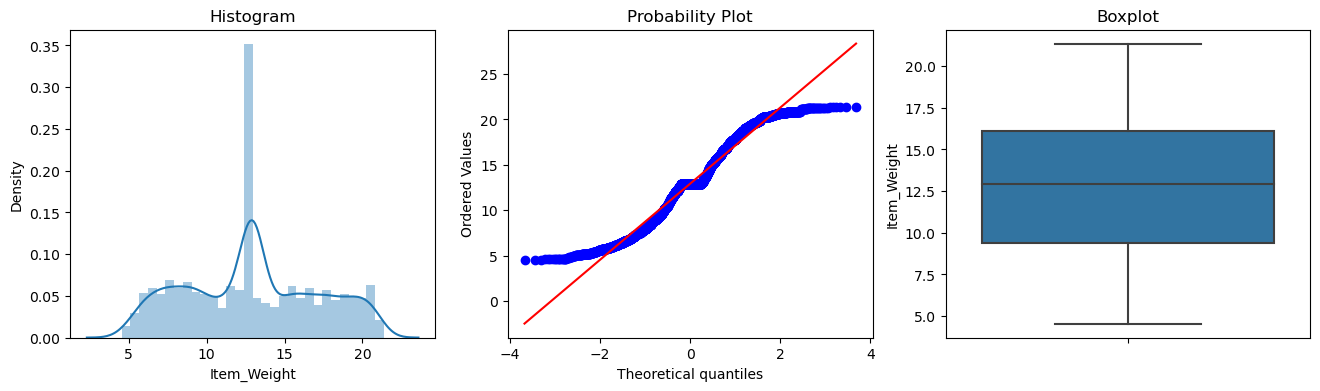

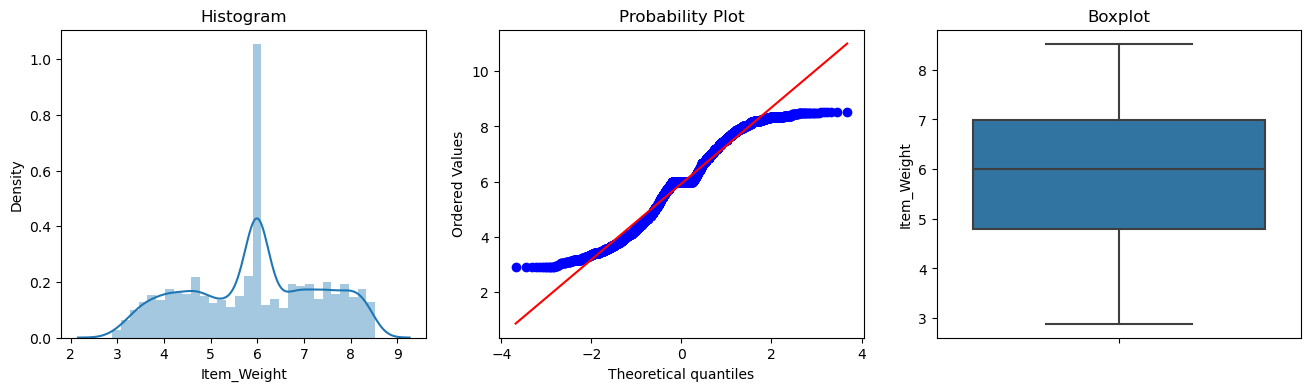

In [621]:
diagnostic_plots(X_train, "Item_Weight")
diagnostic_plots(X_train_power, "Item_Weight")

#after transformation, a very slight left skew appears

##### BoxCox - Item_Weight

In [622]:
X_train_tf = X_train.copy()
X_train_bcox = X_train.copy()

# initialize the transformer with a group of variables to transform
bct = BoxCoxTransformer(variables = ['Item_Weight'])

# fit transformer to the data set
bct.fit(X_train_tf)
X_train_bcox = bct.transform(X_train_tf)

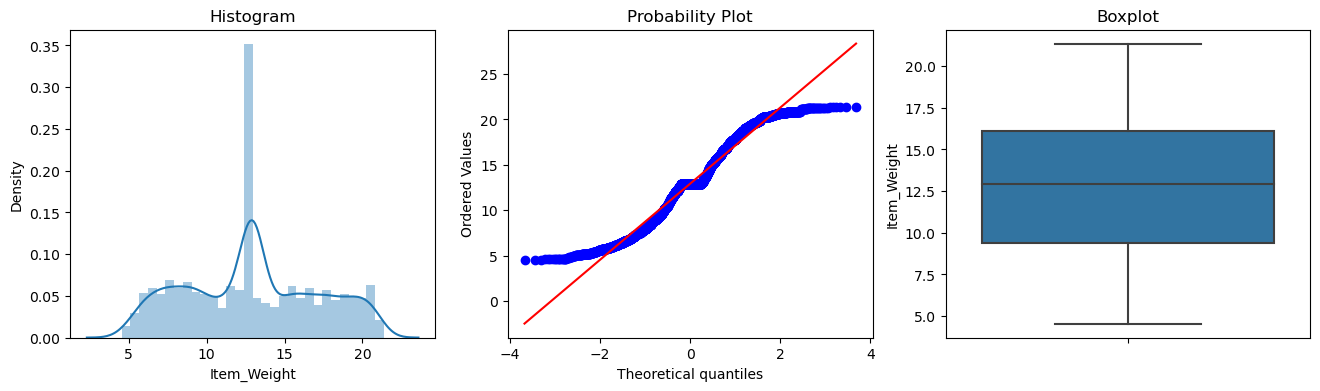

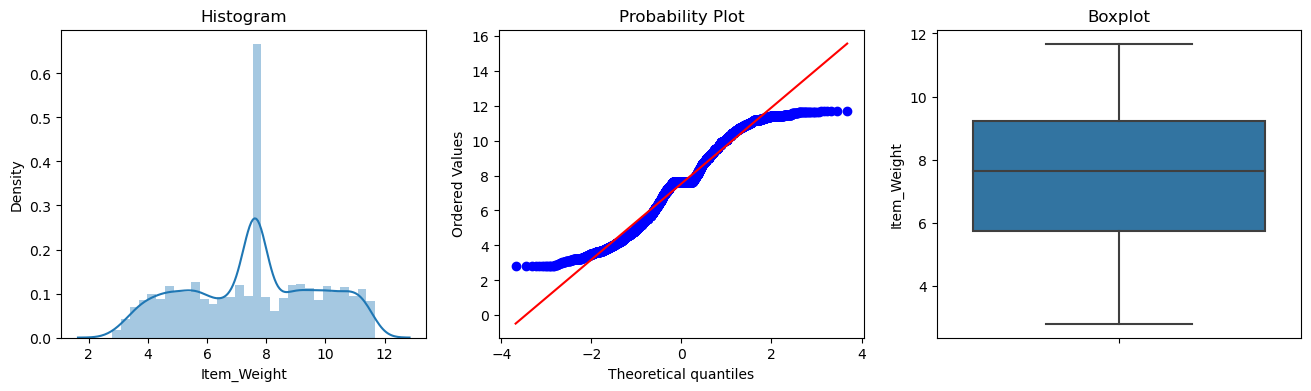

In [623]:
diagnostic_plots(X_train, "Item_Weight")
diagnostic_plots(X_train_bcox, "Item_Weight")

##### Yeo-Johnson - Item_Weight

In [624]:
X_train_tf = X_train.copy()
# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = ['Item_Weight'])

# fit transformer to the dataframe
yjt.fit(X_train_tf)
X_train_yjt = yjt.transform(X_train_tf)

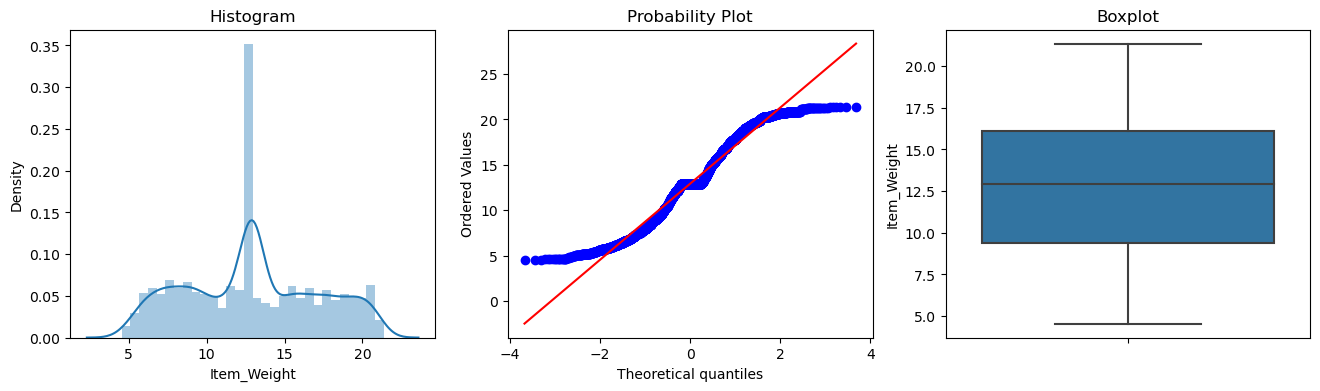

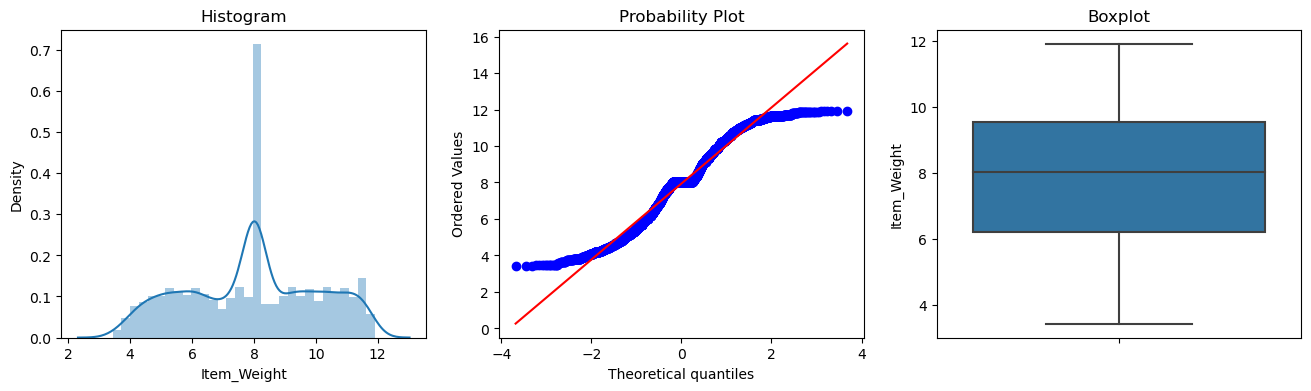

In [625]:
diagnostic_plots(X_train, "Item_Weight")
diagnostic_plots(X_train_yjt, "Item_Weight")

#after transformation, looks about the same

##### Logarithmic - Item_Visibility
Logarithmic transforming can't be done for Item_Visibility as it contains zero values.

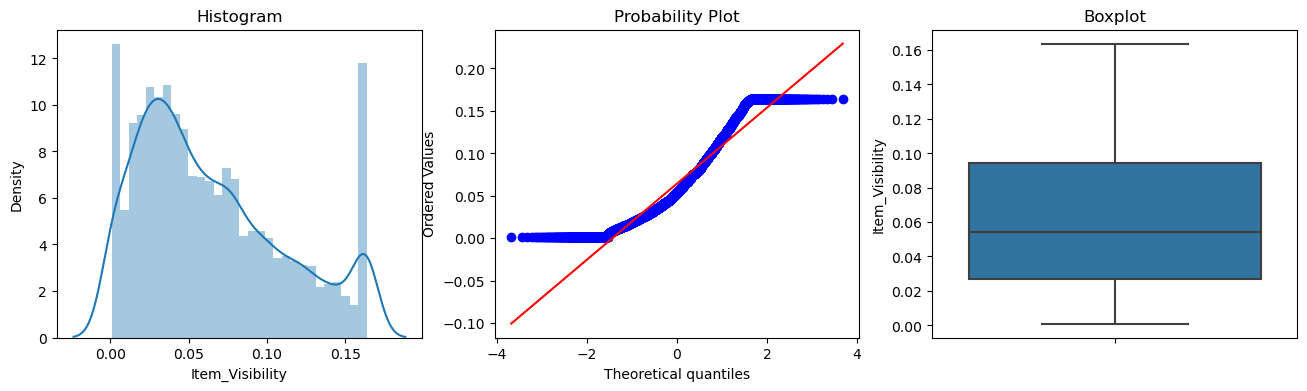

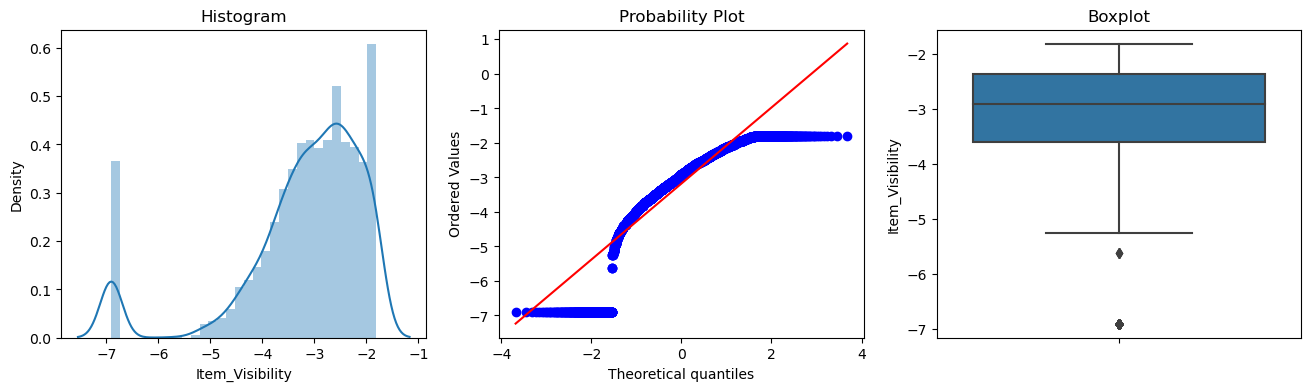

In [626]:
X_train_tf = X_train.copy()

lt = LogTransformer(variables='Item_Visibility')

lt.fit(X_train_tf)
X_train_log = lt.transform(X_train_tf)

diagnostic_plots(X_train, "Item_Visibility")
diagnostic_plots(X_train_log, "Item_Visibility")
#after transformation, big left skew in distribution appears

##### Reciprocal - Item_Visibility
Reciprocal transforming can't be done for Item_Visibility as it contains zero values.

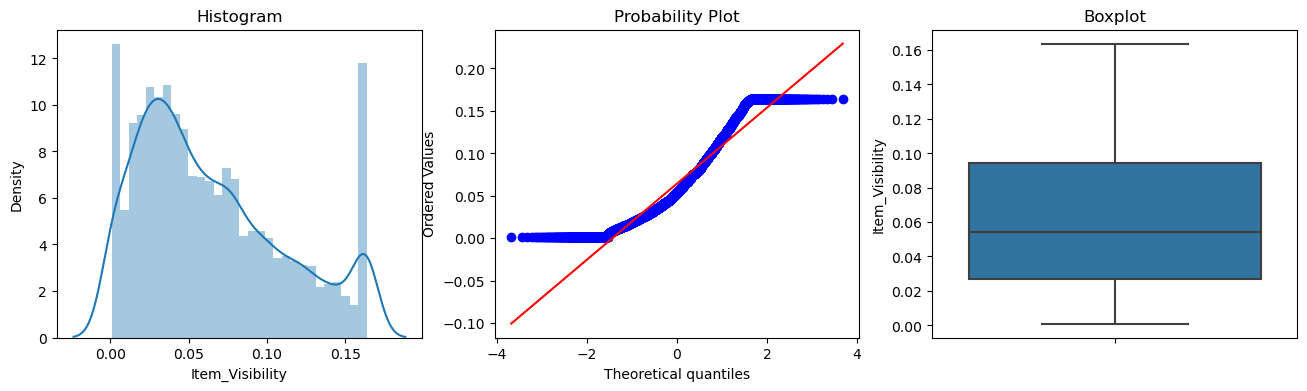

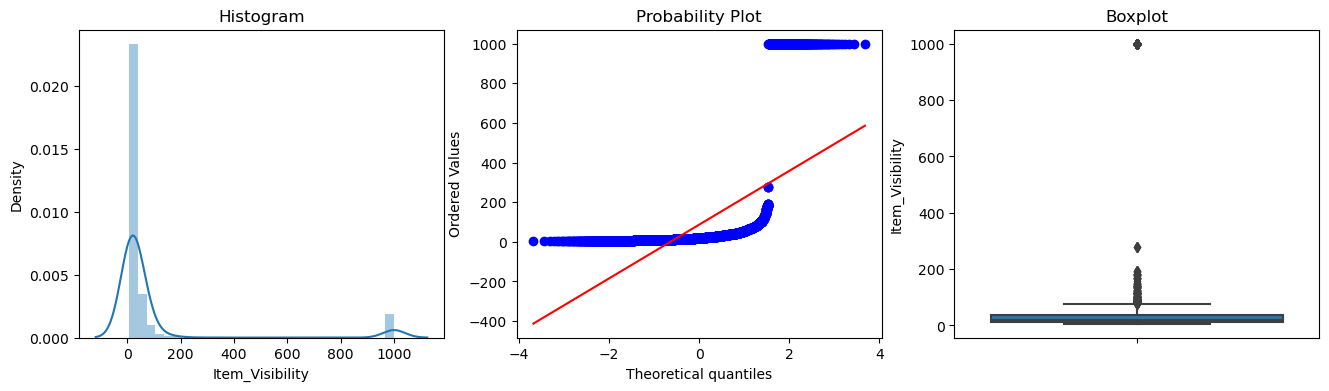

In [627]:
X_train_tf = X_train.copy()
X_train_rec = X_train.copy()

X_train_rec['Item_Visibility'] = np.reciprocal(X_train_tf['Item_Visibility'])

diagnostic_plots(X_train, "Item_Visibility")
diagnostic_plots(X_train_rec, "Item_Visibility")
#after transformation, manmade horrors beyond my comprehension.
#joking. very severe right skew appears

##### Square Cube Root - Item_Visibility

In [628]:
X_train_tf = X_train.copy()
X_train_sqr = X_train.copy()
# set up PowerTransformer with the square root exponent
et = PowerTransformer(variables = ['Item_Visibility'], exp=1/3) # for cube root

# fit transformer to data 
et.fit(X_train_tf)
X_train_sqr = et.transform(X_train_tf)

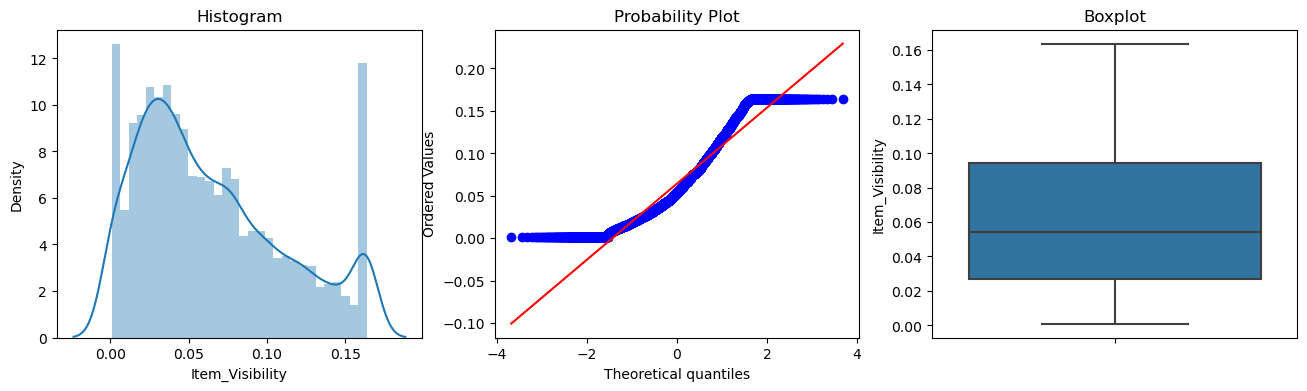

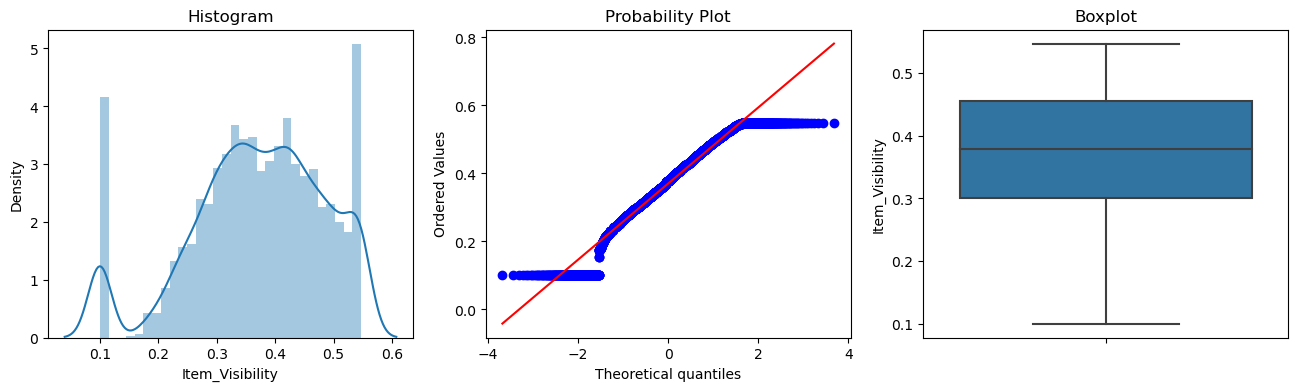

In [629]:
diagnostic_plots(X_train, "Item_Visibility")
diagnostic_plots(X_train_sqr, "Item_Visibility")



##### Power - Item_Visibility

In [630]:
X_train_pow = X_train.copy()
X_train_tf = X_train.copy()

X_train_pow["Item_Visibility"] = np.power(X_train_tf["Item_Visibility"], 0.3)

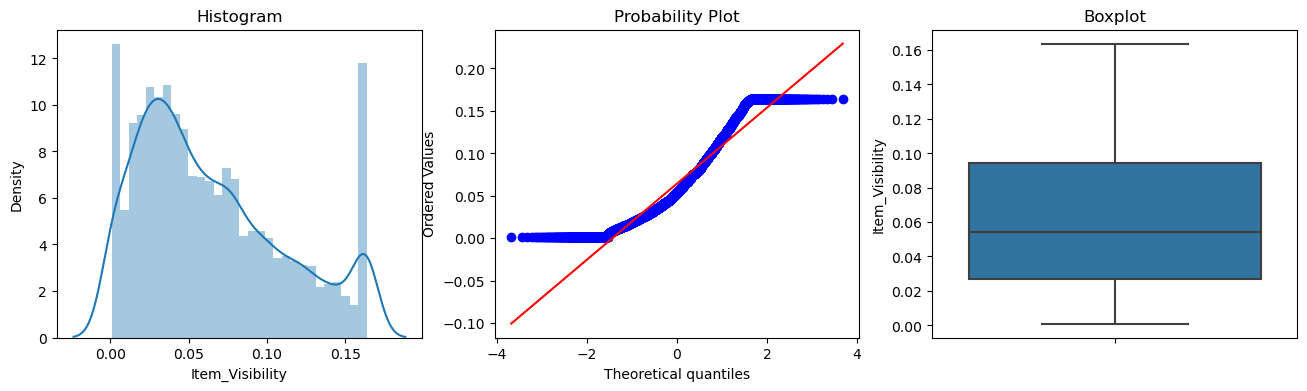

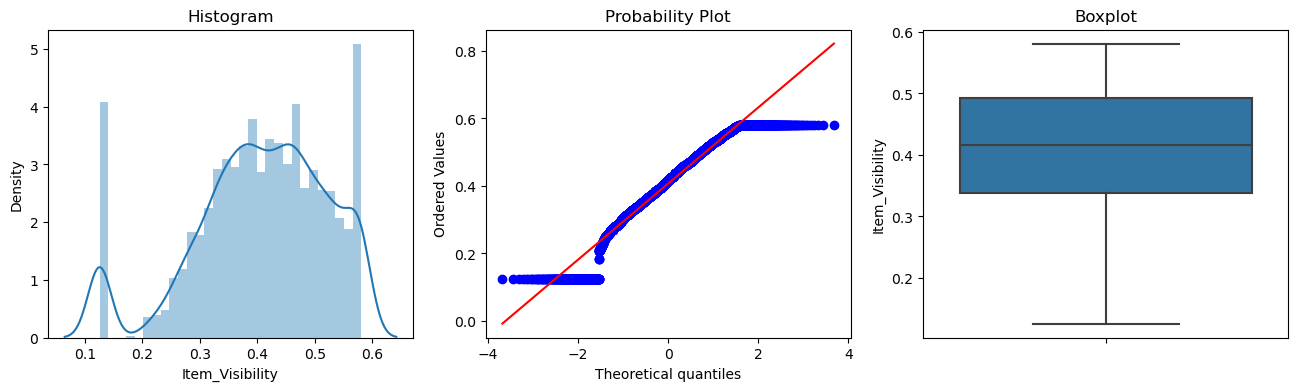

In [631]:
diagnostic_plots(X_train, "Item_Visibility")
diagnostic_plots(X_train_pow, "Item_Visibility")

#after transformation, right skew from before disappears.
#however there is a gap between values at near 0 and 2nd next value near 0

##### BoxCox - Item_Visibility
BoxCox transformation can't be done for Item_Visibility as it contains zero values

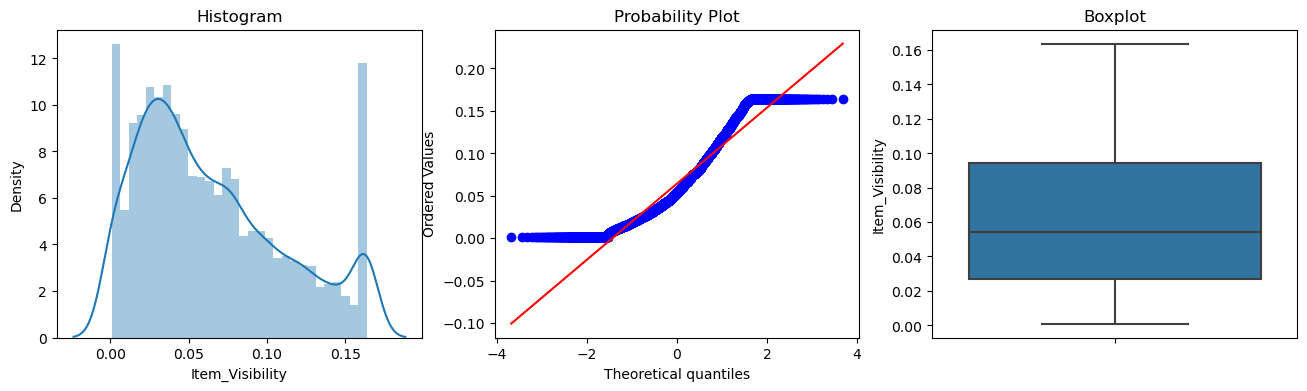

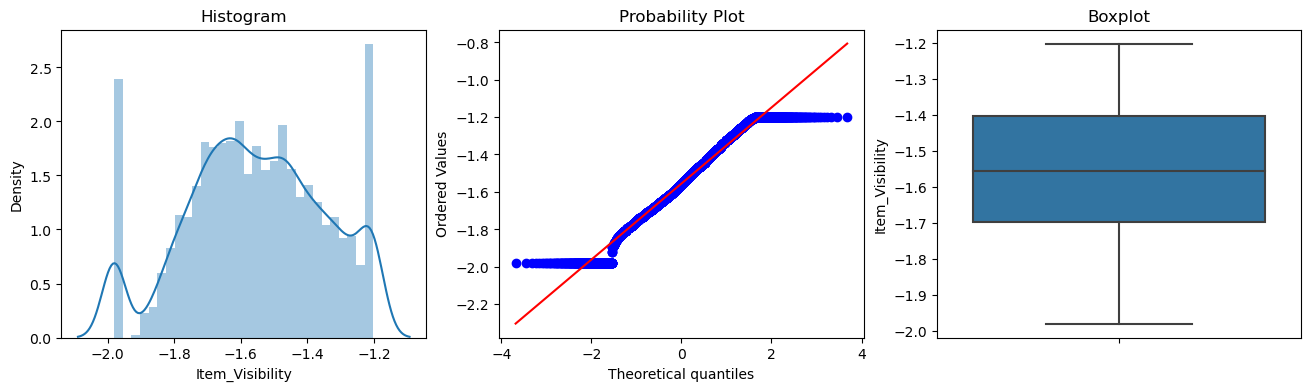

In [632]:
X_train_bcox = X_train.copy()
x_train_tf = X_train.copy()

bct = BoxCoxTransformer(variables = ['Item_Visibility'])

bct.fit(X_train_tf)
X_train_bcox = bct.transform(X_train_tf)
diagnostic_plots(X_train, "Item_Visibility")
diagnostic_plots(X_train_bcox, "Item_Visibility")

#however there is a gap between values at near 0 and 2nd next value near 0

##### Yeo-Johnson - Item_Visibility

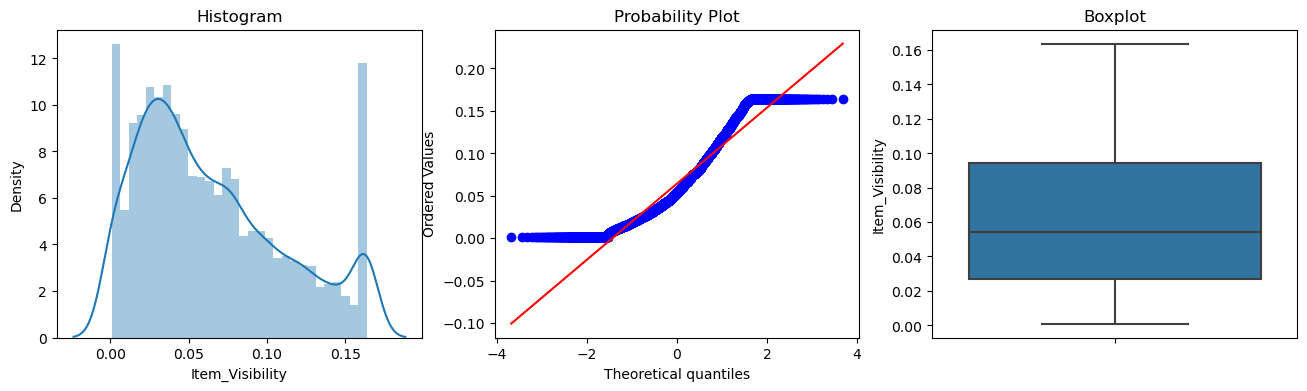

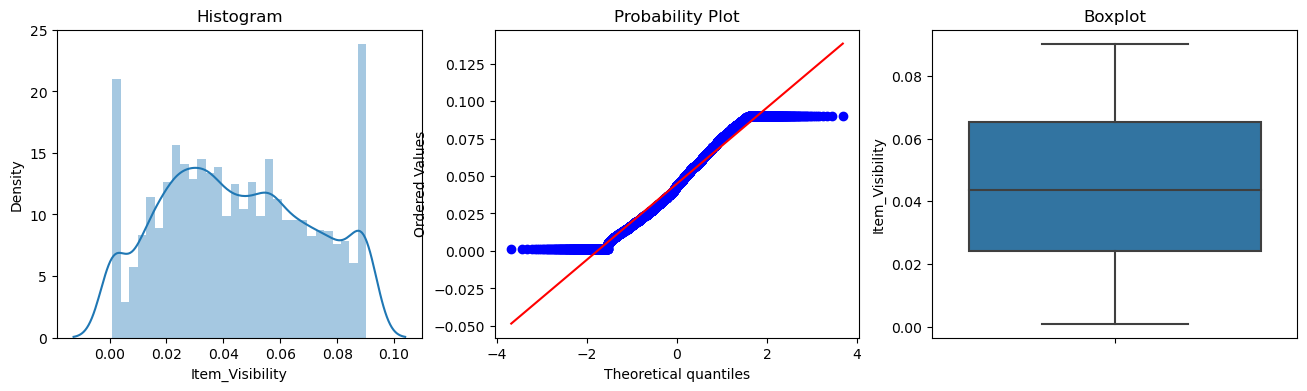

In [633]:
X_train_yjt = X_train.copy()
X_train_tf = X_train.copy()

yjt = YeoJohnsonTransformer(variables = ['Item_Visibility'])

yjt.fit(X_train_tf)
X_train_yjt = yjt.transform(X_train_tf)
diagnostic_plots(X_train, "Item_Visibility")
diagnostic_plots(X_train_yjt, "Item_Visibility")

#after transformation, right skew from before disappears
#there is continuity between the values

In the end, I decided on:
<br>Yeo-Johnson for Item_Weight as I felt like it gave me the most symmetrical distribution
<br>Yeo-Johnson for Item_Visibility as I it gave me a sort of balanced distribution while providing continuity between the values.

In [634]:
#Item_Weight
yjt = YeoJohnsonTransformer(variables = ["Item_Weight"])
yjt.fit(X_train)
yjt.transform(X_train)
yjt.transform(X_test)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4931,8.792147,Low Fat,0.089960,Health and Hygiene,159.5604,OUT045,2002,Missing,Tier 2,Supermarket Type1
4148,8.028207,Low Fat,0.009535,Snack Foods,64.5510,OUT027,1985,Medium,Tier 3,Supermarket Type3
7423,7.312167,Low Fat,0.017742,Health and Hygiene,129.6626,OUT017,2007,Missing,Tier 2,Supermarket Type1
4836,6.639244,Low Fat,0.001000,Frozen Foods,143.1154,OUT017,2007,Missing,Tier 2,Supermarket Type1
944,11.760466,Low Fat,0.049264,Snack Foods,195.0478,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...
5460,8.028207,Low Fat,0.048980,Fruits and Vegetables,148.7050,OUT027,1985,Medium,Tier 3,Supermarket Type3
7384,8.308143,Low Fat,0.021584,Fruits and Vegetables,179.5976,OUT018,2009,Medium,Tier 3,Supermarket Type2
1336,11.629196,Regular,0.100583,Fruits and Vegetables,123.5388,OUT018,2009,Medium,Tier 3,Supermarket Type2
8455,10.424737,Low Fat,0.073607,Canned,156.6972,OUT017,2007,Missing,Tier 2,Supermarket Type1


In [635]:
#Item_Visibility

#X_train["Item_Visibility"] = np.power(X_train_tf["Item_Visibility"], 0.4)

#et = PowerTransformer(variables = ['Item_Visibility'], exp=1/3) # for cube root

#et.fit(X_train)
#X_train = et.transform(X_train)
#X_test = et.transform(X_test)

yjt = YeoJohnsonTransformer(variables = ["Item_Visibility"])
yjt.fit(X_train)
yjt.transform(X_train)
yjt.transform(X_test)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4931,14.500000,Low Fat,0.063312,Health and Hygiene,159.5604,OUT045,2002,Missing,Tier 2,Supermarket Type1
4148,12.929873,Low Fat,0.009157,Snack Foods,64.5510,OUT027,1985,Medium,Tier 3,Supermarket Type3
7423,11.500000,Low Fat,0.016468,Health and Hygiene,129.6626,OUT017,2007,Missing,Tier 2,Supermarket Type1
4836,10.195000,Low Fat,0.000996,Frozen Foods,143.1154,OUT017,2007,Missing,Tier 2,Supermarket Type1
944,21.000000,Low Fat,0.040319,Snack Foods,195.0478,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...
5460,12.929873,Low Fat,0.040131,Fruits and Vegetables,148.7050,OUT027,1985,Medium,Tier 3,Supermarket Type3
7384,13.500000,Low Fat,0.019720,Fruits and Vegetables,179.5976,OUT018,2009,Medium,Tier 3,Supermarket Type2
1336,20.700000,Regular,0.068189,Fruits and Vegetables,123.5388,OUT018,2009,Medium,Tier 3,Supermarket Type2
8455,18.000000,Low Fat,0.054960,Canned,156.6972,OUT017,2007,Missing,Tier 2,Supermarket Type1


### Step 6: Categorical Data Encoding
[Back to report](#report)
<a id="cat_encode"></a>
##### Do you need to encode the Categorical Data? What methods do you use and why?
Methods of Categorical Data Encoding:
<br> One Hot Encoding
<br> Ordinal
<br> Counts Frequency
<br> Ordered Ordinal
<br> Target Mean
<br> Grouping Rare Categories

<Axes: >

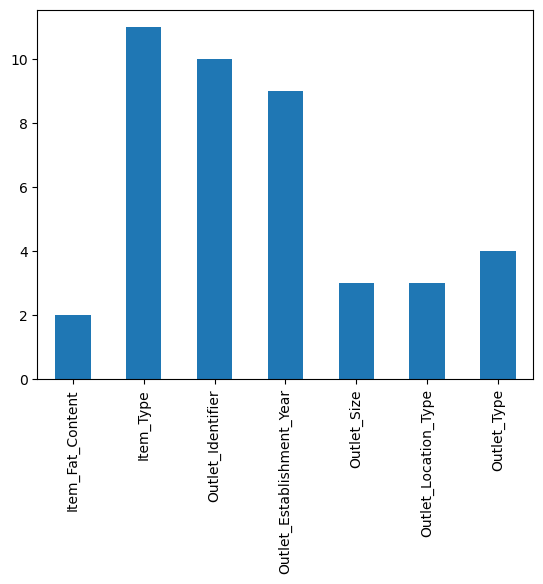

In [636]:
#plotting the cardinality of the features
data[categorical_data].nunique().plot.bar()

In [637]:
#Referring to the portion where I identify rare categories above,
#categorical_data = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
#                    'Outlet_Establishment_Year', 'Outlet_Size','Outlet_Type' ,'Outlet_Location_Type']

#Referring to the above data.nunique(), I will be deciding the following encoding types based off their cardinality:

# OneHotEncoding for Item_Fat_Content, Outlet_Size, Outlet_Type

# Ordinal Encoding for Item_Type, Outlet_Identifier

# Ordered Ordinal Encoding for Outlet_Location_Type

#Outlet_Establishment_Year will remain untouched as by itself it is already a discrete category and in numerical form

### OHE Item_Fat_Content

In [638]:
#OHE Item_Fat_Content
ohe_enc = OneHotEncoder(variables=['Item_Fat_Content'], drop_last = True)
ohe_enc.fit(X_train)
X_train= ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

### OHE Outlet_Size

In [639]:
#OHE Outlet_Size
ohe_enc = OneHotEncoder(variables=['Outlet_Size'], drop_last = True)
ohe_enc.fit(X_train)
X_train= ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test) 

### OHE Outlet_Type

In [640]:
#OHE Outlet_Type
ohe_enc = OneHotEncoder(variables=['Outlet_Type'], drop_last = True)
ohe_enc.fit(X_train)
X_train= ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test) 

### Ordinal Item_Type

In [641]:
#Ordinal Encoding for Item_Type
ordinal_mapping = {
    k: i
    for i, k in enumerate(X_train['Item_Type'].unique(), 0)
}

X_train['Item_Type'] = X_train['Item_Type'].map(ordinal_mapping)
X_test['Item_Type'] = X_test['Item_Type'].map(ordinal_mapping)

### Ordinal Outlet_Identifier

In [642]:
#Ordinal Encoding for Outlet_Identifier
ordinal_mapping = {
    k: i
    for i, k in enumerate(X_train['Outlet_Identifier'].unique(), 0)
}

X_train['Outlet_Identifier'] = X_train['Outlet_Identifier'].map(ordinal_mapping)
X_test['Outlet_Identifier'] = X_test['Outlet_Identifier'].map(ordinal_mapping)

### O.Ordinal Outlet_Location_Type

In [643]:
#Ordered Ordinal Encoding for Outlet_Location_Type
#map for location_type
locType_mapping = {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}
X_train['Outlet_Location_Type'] = X_train['Outlet_Location_Type'].map(locType_mapping)
X_test['Outlet_Location_Type'] = X_test['Outlet_Location_Type'].map(locType_mapping)

### OHE top 10 cats (Item_Type) (DROPPED)
ohe_enc = OneHotEncoder(
    # how many top categories
    top_categories=10,  
    # variables to encode
    variables=['Item_Type'],
    # to indicate if we drop one of the binaries
    drop_last=False)
ohe_enc.fit(X_train)
#Variables in OHE: Fruits&Veggies, Snacks, Household, Frozen, Dairy, Canned, Baking, Health&Hygiene, Meat, Soft Drinks
X_train= ohe_enc.transform(X_train)
X_test= ohe_enc.transform(X_test)

<br> Dropped this because using one hot encoder for Item_Type generates too many columns and drastically reduces model performance

In [644]:
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Fat_Content_Regular,Outlet_Size_Small,Outlet_Size_Missing,Outlet_Size_Medium,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3,Outlet_Type_Grocery Store
88,6.305000,0.123116,0,95.6436,0,1997,1,1,1,0,0,1,0,0
6813,5.980000,0.043809,1,146.8418,1,2007,2,0,0,1,0,1,0,0
4046,12.929873,0.072317,2,160.7920,2,1985,3,0,0,0,1,0,1,0
8194,12.929873,0.163780,3,157.8630,3,1985,1,1,1,0,0,0,0,1
8293,9.100000,0.080278,2,47.2718,4,2004,2,0,1,0,0,1,0,0


### Step 7: Variable Discretization /Binning
[Back to report](#report)
<a id="bin"></a>
##### Do you need to discretize /bin the Numerical Data? What methods do you use and why?

In [645]:
disc = EqualWidthDiscretiser(bins=10, variables = ['Item_Visibility'])
disc.fit(X_train)

X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

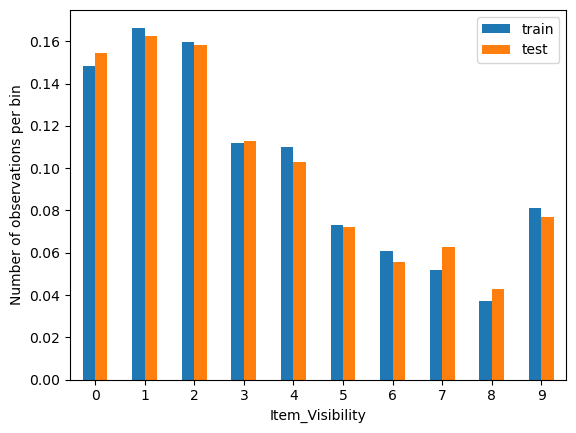

In [646]:
#### Code for Item_Visibility
t1 = X_train.groupby(['Item_Visibility'])['Item_Visibility'].count() / len(X_train)
t2 = X_test.groupby(['Item_Visibility'])['Item_Visibility'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

#### Code for Item_MRP
t1 = train_x.groupby(['Item_MRP'])['Item_MRP'].count() / len(train_x)
t2 = test_x.groupby(['Item_MRP'])['Item_MRP'].count() / len(test_x)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

In [647]:
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Fat_Content_Regular,Outlet_Size_Small,Outlet_Size_Missing,Outlet_Size_Medium,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3,Outlet_Type_Grocery Store
88,6.305000,7,0,95.6436,0,1997,1,1,1,0,0,1,0,0
6813,5.980000,2,1,146.8418,1,2007,2,0,0,1,0,1,0,0
4046,12.929873,4,2,160.7920,2,1985,3,0,0,0,1,0,1,0
8194,12.929873,9,3,157.8630,3,1985,1,1,1,0,0,0,0,1
8293,9.100000,4,2,47.2718,4,2004,2,0,1,0,0,1,0,0


#### Originally I had wanted to discretize both Item_Visibility and Item_MRP variables,
but later on I realised that I wanted to use my Item_MRP for polynomial expansion, so I only binned Item_Visibility.
I binned Item_Visibility as in comparison to the rest of the data, it has extremely small values that may negatively influence the way the model reads the data, so I binned it.

### Step 8: Feature Engineer
[Back to report](#report)
<a id="engineer"></a>
##### Do you need to scale the data? What method do you use and why? Do you create any new  features/variables and why? Do you drop any features/variables and why? 
I need to scale the data as they are on vastly different scales. I will be using Standardization as it makes my data unitless.

#### Scaling the data
[Back to report](#report)
<a id="scale"></a>

In [648]:
scaler = StandardScaler()

#training the scaler
scaler.fit(X_train)

#transforming
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

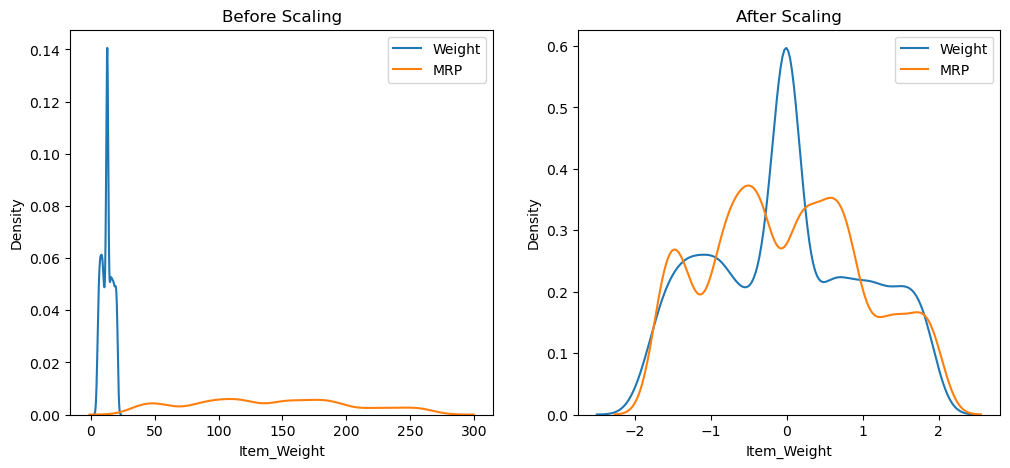

In [649]:
# comparing variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Item_Weight'], ax=ax1, label ='Weight')
sns.kdeplot(X_train['Item_MRP'], ax=ax1, label ='MRP')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Item_Weight'], ax=ax2, label ='Weight')
sns.kdeplot(X_train_scaled['Item_MRP'], ax=ax2, label ='MRP')
ax2.legend()
plt.show()

In [650]:
#converting X_scaled back into X_
X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()

#### Polynomial Expansion
[Back to report](#report)
<a id="polyex"></a>

<Axes: >

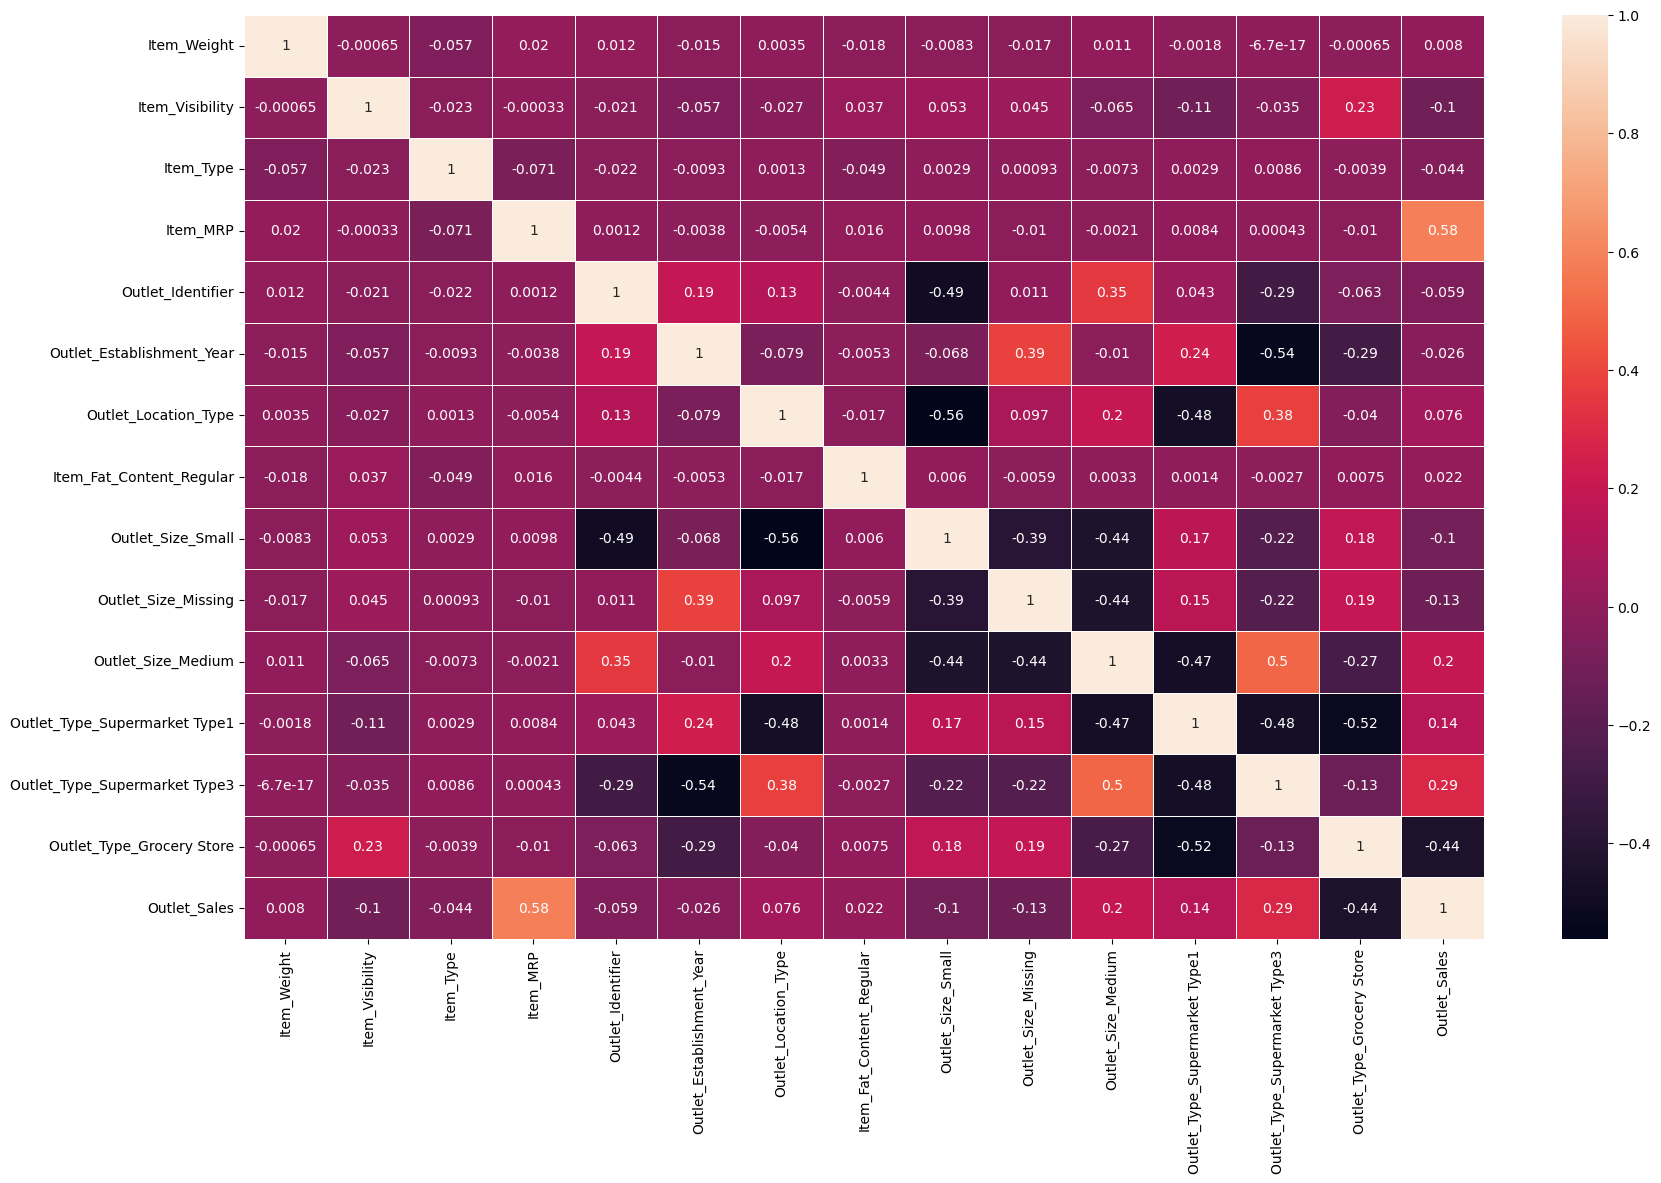

In [651]:
fig, ax = plt.subplots(figsize=(20, 12))

correlation_data = X_train.copy()
correlation_data['Outlet_Sales'] = y_train.tolist()

sns.heatmap(correlation_data.corr(), annot=True, linewidth=.5)


In [652]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

poly.fit(X_train[['Item_MRP', 'Item_Weight', 'Outlet_Type_Grocery Store']])
train_x = poly.transform(X_train[['Item_MRP', 'Item_Weight', 'Outlet_Type_Grocery Store']])
test_x = poly.transform(X_test[['Item_MRP', 'Item_Weight', 'Outlet_Type_Grocery Store']])

X_train = np.concatenate((X_train, train_x), axis=1)
X_test = np.concatenate((X_test, test_x), axis=1)

#### PCA
[Back to report](#report)
<a id="pca"></a>

In [653]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [654]:
pca = PCA(n_components = 30)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [655]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.91928078e-01, 1.09996231e-01, 9.61640735e-02, 5.62140583e-02,
       3.99581786e-02, 3.13670393e-02, 2.34317056e-02, 1.48878373e-02,
       1.36562984e-02, 1.27943640e-02, 1.17400577e-02, 1.13859966e-02,
       1.07495205e-02, 1.02724749e-02, 1.01362453e-02, 1.00294197e-02,
       9.13311642e-03, 8.39828620e-03, 7.65590778e-03, 6.69934349e-03,
       5.82812739e-03, 2.77906819e-03, 2.53667496e-03, 1.74961135e-03,
       5.02646909e-04, 5.63866680e-06, 2.07335520e-28, 1.21341457e-31,
       2.92733368e-33, 2.92733368e-33])

### Step 9: Linear Regression Modelling

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [656]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

In [657]:
X_train_final = X_train.copy()
X_test_final = X_test.copy()

y_train_final = y_train.copy()
y_test_final = y_test.copy()

In [658]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [659]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using Mean Absolute Error (MAE)
# The lower MAE, the better model performance
print('train_mae:', mean_absolute_error(y_train, model_linear_regression.predict(X_train_final)), 
      '\n test_mae:', mean_absolute_error(y_test, model_linear_regression.predict(X_test_final)))

train_mse: 876268.5051616413 
 test_mse: 958309.7541093759
train_r-sq: 0.6247297863693946 
 test_r-sq: 0.6161990072388829
train_mae: 692.1341197081355 
 test_mae: 726.6758631533917


# Report
<a id="report"></a>
#### Intro/ Problem Understanding
A dataset containing information gathered from multiple supermarket outlets and stores has been made available by the management team. The goal is to get the data ready for creating a simple linear regression model that can predict each product's sales. The aim of evaluating and preparing this data is to develop an appropriate regression model for prediction and gain an understanding of the fundamental characteristics of products and outlets that affect sales.

I will be using TIBCO Spotfire to first explore the data, then python and its data wrangling-related modules to perform data-wrangling techniques like:
- Handling missing data and outliers
- Categorical encoding and numerical transformation
- Feature engineering

#### [Exploring the data](#data_explore)
I performed surface – level data exploration by visualizing the relationships between the target variable and the different features of the dataset. From my exploration, I found out that only Item_MRP had a positive linear relationship with the target. Another important find was that for the discrete feature Outlet_Size, there were missing values that when their average target variable was compared with the rest, was similar to that of the Small Outlet_Size. For the rest of the features, I will split my findings into 2 sections: Discrete and Continuous.

- ###### Discrete – Establishment_Year, Item_Type, Outlet_Type, Fat_Content:
Establishment_Year: I plotted a line chart showing the average target for each year. The only notable finding was that 1998 was an extreme outlier in that it had an extremely low target.<br>
Item_Type: I plotted a bar chart that showed the average target per category in Item_Type. The average target for each Item_Type category was similar and there was no clear trend or pattern. Additionally, the visual showed high cardinality.<br>
Outlet_Type: Only the Grocery Store category had extremely low average target as compared to the other Supermarket Outlet_Type categories. The visual shows low cardinality.<br>
Fat_Content: There are some misnamed columns that will need to be changed and the visual shows low cardinality.

- ###### Numerical – Visibility, Weight
Item_Visibility: I plotted a scatter plot that showed the Item_Visibility against the target variable. Item_Visibility columns above the 0.18 mark started to give very low target values. The feature as a whole did not have a strong linear relationship with the target variable.<br>
Item_Weight: I plotted a scatter plot as well that showed the Item_Weight against the target variable. There was no clear patterns or trends or any sign of a relationship between Item_Weight and the target variable.


#### Cleaning the data
###### [Missing data](#imputation)
First to find columns with missing values, I made a bar chart that showed the percentage of missing values, and double checked again with a data.isnull().mean(). If the values were anything other than 0, that meant that there were missing values in that feature. The features with missing values were Item_Weight and Outlet_Size. <br>

- ###### Item_Weight<br>
Since Item_Weight is a numerical continuous feature, I first looked at the distribution of the data by plotting a box plot with seaborn. There were no outliers and the distribution was quite balanced so I decided to use Mean Imputation to fill in the missing values for Item_Weight. Mean Imputation was used as it does not introduce any unnecessary bias to the distribution of the data. <br>
- ###### Outlet_Size <br>
Since Outlet_Size is a discrete categorical feature, I did not have to look at any distribution.  Instead, I referred to my earlier data exploration where I found out that the average target variable for columns with missing Outlet_Size was similar to those with a Small Outlet_Size, so I used bespoke imputation to change the missing values to Small. Originally, I regrouped the missing values as just “Missing”, but after merging it with Small Outlet_Size, my R-sq score improved.


###### [Handling outliers](#outliers)
First, I displayed the diagnostic plots for numerical data (excluding Outlet_Establishment_Year) which included a histogram, a probability plot and a boxplot. The only plot needed here was the boxplot but the function made included the other plots which will be used later. The boxplot showed the distribution of the data and outliers (if any). Features with outliers were: Item_Visibility and Item_Outlet_Sales. <br>
- ###### Winsorizer
I used the winsorizer method to handle the outliers by taking away the top 5% of the data with outliers. Originally I was going to winsorize both top and bottom 5% but when I looked back at the boxplot, the outliers were only shown to be above the Q3, which is the right tail. This meant that if I winsorized both tails I would be losing out potentially meaningful data for the model.


#### Data Transformation<br>
- ###### [Categorical Encoding](#cat_encode) <br>
To start off, I plotted the bar chart for the cardinality of my categorical variables again. This is when I realised that the high cardinality of the Item_Identifier column will mess with my model’s performance no matter how it is encoded, this resulted in dropping the column before splitting the data into train and test sets. This portion will be split into different segments: Low and high cardinality.
	- ###### Low Cardinality – Fat_Content, Outlet_Size, _Location_Type, _Type
For Item_Fat_Content, Outlet_Size and Outlet_Type, I used the One Hot Encoding technique as they had low cardinality and had no hierarchy. This meant that it would not generate many extra columns that could end up messing with my model’s performance. <br>
<br>
However for Outlet_Location_Type, I used the Ordered Ordinal Encoding technique as it had a hierarchy.
    - ###### High Cardinality – Item_Type, Outlet_Identifier, Outlet_Establishment_Year
For Item_Type and Outlet_Identifier, I used the Ordinal Encoding technique as they had high cardinality and no hierarchy. I had tried to use One Hot Encoding for Item_Type before, but it drastically reduced the performance of my model. <br>
<br>
Outlet_Establishment_Year was left untouched as it was already in numerical form.


- ###### [Numerical Transformation](#transform)
To see features I had to numerically transform, I referred to the earlier diagnostic plots for all the numerical features and saw that Item_Weight and Item_Visibility needed to be transformed to have a more normal distribution. For Item_Visibility, I first capped the minimum to be an extremely small value so that logarithmic, reciprocal and boxcox transformation would work on it as originally Item_Visibility had zero values. For both features, I tried every transformation to see which one was best for them. In the end, I arrived at Yeo Johnson transformation for both features.<br>
<br>
I chose Yeo Johnson for Item_Weight as I felt like it gave me the most balanced distribution out of all the transformers. For Item_Visibility, it was because it gave a balanced distribution as well as continuity between the values and there weren’t any gaps in the histogram in the diagnostic plots.<br>

    - ###### [Binning](#bin)
    I binned Item_Visibility as it had extremely small values in comparison to the rest of the data which may negatively influence the model's interpretation of it is what I thought at first. I then remembered that I was scaling the data later on so small values would not matter but I found out that binning Item_Visiblity helped to increase my R-sq score. Item_Weight and Item_MRP was not binned as I wanted to use it for polynomial expansion.


#### [Feature_Engineering](#engineer)
- ###### [Scaling](#scale)
I scaled my remaining continuous data using Standardization. This scaling method was chosen as quick research shows that Standardization is helpful when features in the data have different scales. In this case, I had 2 features on different scales: Item_Weight and Item_MRP. Standardizing also helps to remove the units of measure of features. For example Item_Weight would be in grams and Item_MRP would be in dollars but after Standardizing they are just values.
- ###### [Polynomial Expansion](#polyex)
Before starting on polynomial expansion, I first made a correlation heatmap using seaborn after making a copy of my X_train dataframe and appending the target variable to the end. This allowed me to see which features were highly correlated to the target variable. In the end, I settled on using polynomial expansion on my continuous numerical features and Outlet_Type_Grocery Store (obtained from One Hot Encoding). I performed Polynomial Expansion as it allows the model to explore more complex relationships between my continuous data.
- ###### [PCA](#pca)
After Polynomial Expansion, I now had many columns in my dataset. Too many columns can negatively affect the model’s performance, so I performed PCA on the data. PCA helps to reduce the dimensionality of the data while preserving important information and helps to compress the features. After performing PCA, I had less columns.
    
#### Linear Regression Model<br>
In the end, these were the values I attained: <br>
train_mse: 876268.5051616413 <br>
 test_mse: 958309.7541093759 <br>
train_r-sq: 0.6247297863693946 <br>
 test_r-sq: 0.6161990072388829 <br>
train_mae: 692.1341197081355 <br>
 test_mae: 726.6758631533917 <br>
 
#### Summary and Further Improvements<br>
- ###### Summary
    - Item_MRP has strong relationship with target, and missing values in Outlet_Size regrouped into Small
    - Outliers handled for the top 5% for Item_Visibility and targte variable
    - One Hot Encoding for low cardinality categorical features with the exception of Outlet_Location_Type. Ordinal encoding for the rest
    - Yeo Johnson transformation for both Item_Weight and Item_Visibility, Item_Visibility binned
    - Performed Scaling, Polynomial Expansion and PCA in that order
- ###### Further Improvements
The first possible improvement is that the data could have been explored further. I limited my data exploration to only relationships between features and the target as I did not have enough time to explore the data in univariate, bivariate and multivariate perspectives due to having to work on other assignments at the same time. Exploring the data further would have allowed me to discover more correlations between features that I could have included in my Polynomial Expansion. <br>
<br>
The second possible improvement is that I could have tried more permutations for categorical encoding and Polynomial Expansion. Again, due to time constraints I didn't manage to try alot of combinations and just went with what was logical.<br>
<br>
In the end it all comes down to just starting the assignment earlier, or even better yet as soon as it was released.

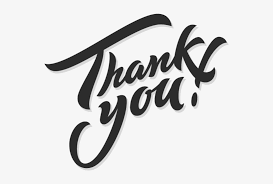

Youtube Video Link: https://youtu.be/g_M2CIZZFhc